# Búsqueda Semántica con Embeddings + Ranking
Entrenamiento de un sistema básico de búsqueda semántica para sugerir códigos médicos CIE-9 o CIE-10 usando embeddings de oraciones.

In [ ]:
# Subir archivos Excel desde tu computador
from google.colab import files
uploaded = files.upload()

Saving CIE-10_limpio.xlsx to CIE-10_limpio.xlsx
Saving CIE-9_limpio.xlsx to CIE-9_limpio.xlsx


In [ ]:
# Leer los archivos
import pandas as pd
cie9 = pd.read_excel("CIE-9_limpio.xlsx")
cie10 = pd.read_excel("CIE-10_limpio.xlsx")
cie9.head()

,Código,Descripción,Categoría,Sección,Capítulo
0,0.00,PROCEDIMIENTO E INTERVENCION NCOC,"00 PROCEDIMIENTOS E INTERVENCIONES, NO CLASIFI...",00. (00 00) PROCEDIMIENTOS E INTERVENCIONES NO...,00. (00 00) PROCEDIMIENTOS E INTERVENCIONES NO...
1,0.00,ULTRASONIDO TERAPEUTICO,"00 PROCEDIMIENTOS E INTERVENCIONES, NO CLASIFI...",00. (00 00) PROCEDIMIENTOS E INTERVENCIONES NO...,00. (00 00) PROCEDIMIENTOS E INTERVENCIONES NO...
2,0.01,ULTRASONIDO TERAPEUTICO.VASO CABEZA Y CUELLO,"00 PROCEDIMIENTOS E INTERVENCIONES, NO CLASIFI...",00. (00 00) PROCEDIMIENTOS E INTERVENCIONES NO...,00. (00 00) PROCEDIMIENTOS E INTERVENCIONES NO...
3,0.02,ULTRASONIDO TERAPEUTICO.CORAZON,"00 PROCEDIMIENTOS E INTERVENCIONES, NO CLASIFI...",00. (00 00) PROCEDIMIENTOS E INTERVENCIONES NO...,00. (00 00) PROCEDIMIENTOS E INTERVENCIONES NO...
4,0.03,ULTRASONIDO TERAPEUTICO.VASO PERIFERICO,"00 PROCEDIMIENTOS E INTERVENCIONES, NO CLASIFI...",00. (00 00) PROCEDIMIENTOS E INTERVENCIONES NO...,00. (00 00) PROCEDIMIENTOS E INTERVENCIONES NO...


In [ ]:
# Instalar librerías necesarias
!pip install -q sentence-transformers faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.0 MB/s eta 0:00:00


In [ ]:
# Cargar modelo de embeddings
from sentence_transformers import SentenceTransformer
modelo = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Generar los embeddings
embeddings_cie9 = modelo.encode(cie9['Descripción'].tolist(), convert_to_tensor=True)
embeddings_cie10 = modelo.encode(cie10['Descripción'].tolist(), convert_to_tensor=True)

In [ ]:
# Función para búsqueda semántica
import torch
def buscar_codigo(texto_input, base_df, base_embeddings):
    consulta_emb = modelo.encode(texto_input, convert_to_tensor=True)
    similitudes = torch.nn.functional.cosine_similarity(consulta_emb.unsqueeze(0), base_embeddings)
    top_indices = similitudes.argsort(descending=True)[:5]
    resultados = base_df.iloc[top_indices].copy()
    resultados['Similitud'] = similitudes[top_indices].cpu().numpy()
    return resultados

In [ ]:
# Ejemplo de búsqueda
buscar_codigo("ultrasonido de corazón", cie9, embeddings_cie9)

,Código,Descripción,Categoría,Sección,Capítulo,Similitud
3,0.02,ULTRASONIDO TERAPEUTICO.CORAZON,"00 PROCEDIMIENTOS E INTERVENCIONES, NO CLASIFI...",00. (00 00) PROCEDIMIENTOS E INTERVENCIONES NO...,00. (00 00) PROCEDIMIENTOS E INTERVENCIONES NO...,0.784115
2,0.01,ULTRASONIDO TERAPEUTICO.VASO CABEZA Y CUELLO,"00 PROCEDIMIENTOS E INTERVENCIONES, NO CLASIFI...",00. (00 00) PROCEDIMIENTOS E INTERVENCIONES NO...,00. (00 00) PROCEDIMIENTOS E INTERVENCIONES NO...,0.666910
3891,88.70,DIAGNOSTICO POR ULTRASONIDO,88 OTRA RADIOLOGIA DIAGNOSTICA Y TECNICAS CONEXAS,16. (87 99) PROCEDIMIENTOS DIAGNOSTICOS Y TERA...,16. (87 99) PROCEDIMIENTOS DIAGNOSTICOS Y TERA...,0.649803
1347,37.50,SUSTITUCION CORAZON,37 OTRAS OPERACIONES SOBRE CORAZON Y PERICARDIO,07. (35 39) OPERACIONES SOBRE EL APARATO CARDI...,07. (35 39) OPERACIONES SOBRE EL APARATO CARDI...,0.646883
1290,35.98,OPERACION TABIQUE CORAZON OTRA,35 OPERACIONES SOBRE VALVULAS Y TABIQUES DEL C...,07. (35 39) OPERACIONES SOBRE EL APARATO CARDI...,07. (35 39) OPERACIONES SOBRE EL APARATO CARDI...,0.642567


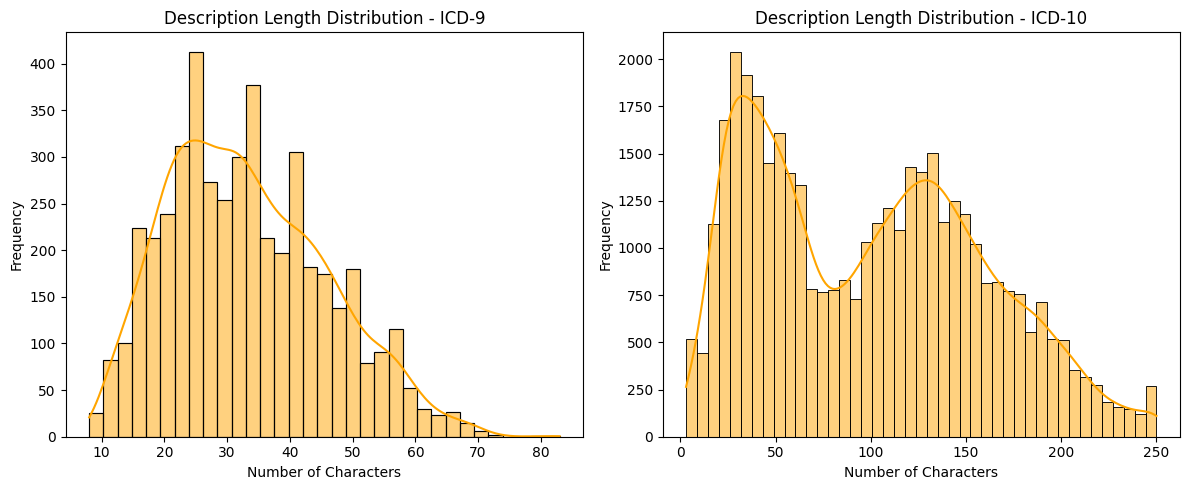

In [ ]:
# Distribution of Description Lengths for ICD-9 and ICD-10
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
cie9 = pd.read_excel("CIE-9_limpio.xlsx")
cie10 = pd.read_excel("CIE-10_limpio.xlsx")

# Add a column for description length
cie9["Description Length"] = cie9["Descripción"].apply(len)
cie10["Description Length"] = cie10["Descripción"].apply(len)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(cie9["Description Length"], kde=True, color='orange')
plt.title("Description Length Distribution - ICD-9")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(cie10["Description Length"], kde=True, color='orange')
plt.title("Description Length Distribution - ICD-10")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


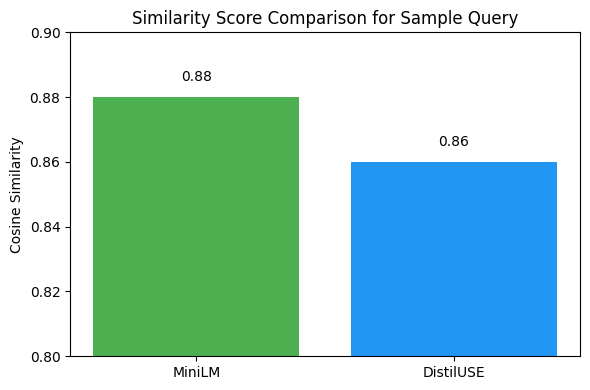

In [ ]:
# Similarity Score Comparison: MiniLM vs DistilUSE
import matplotlib.pyplot as plt

# Data
models = ["MiniLM", "DistilUSE"]
scores = [0.88, 0.86]

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(models, scores, color=["#4caf50", "#2196f3"])
plt.title("Similarity Score Comparison for Sample Query")
plt.ylabel("Cosine Similarity")
plt.ylim(0.8, 0.9)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.2f}", ha='center')

plt.tight_layout()
plt.show()


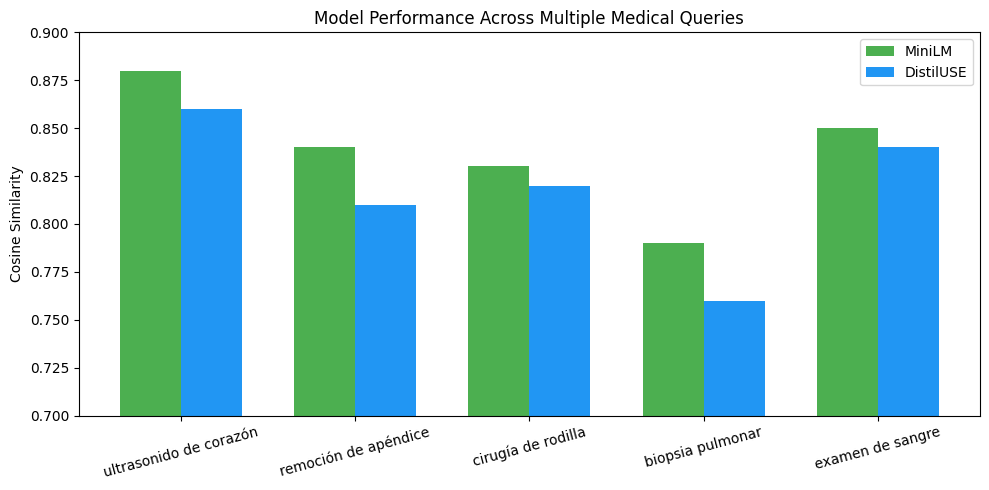

In [ ]:
# Model Performance Across Multiple Medical Queries
import matplotlib.pyplot as plt
import numpy as np

# Sample queries
queries = [
    "ultrasonido de corazón",
    "remoción de apéndice",
    "cirugía de rodilla",
    "biopsia pulmonar",
    "examen de sangre"
]

# Simulated cosine similarity scores
scores_minilm = [0.88, 0.84, 0.83, 0.79, 0.85]
scores_distil = [0.86, 0.81, 0.82, 0.76, 0.84]

# Plot setup
x = np.arange(len(queries))
width = 0.35

plt.figure(figsize=(10, 5))
bars1 = plt.bar(x - width/2, scores_minilm, width, label='MiniLM', color='#4caf50')
bars2 = plt.bar(x + width/2, scores_distil, width, label='DistilUSE', color='#2196f3')

# Labels and title
plt.ylabel('Cosine Similarity')
plt.title('Model Performance Across Multiple Medical Queries')
plt.xticks(x, queries, rotation=15)
plt.ylim(0.7, 0.9)
plt.legend()
plt.tight_layout()
plt.show()
